In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.metrics import accuracy_score, confusion_matrix

In [2]:
train=pd.read_csv('desktop/train.csv')
test=pd.read_csv('desktop/test.csv')

In [3]:
train.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train.sample()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
395,396,0,3,"Johansson, Mr. Erik",male,22.0,0,0,350052,7.7958,NaN,S


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
nu=train.isnull().sum()
nu[nu>1]

Age         177
Cabin       687
Embarked      2
dtype: int64

<Axes: >

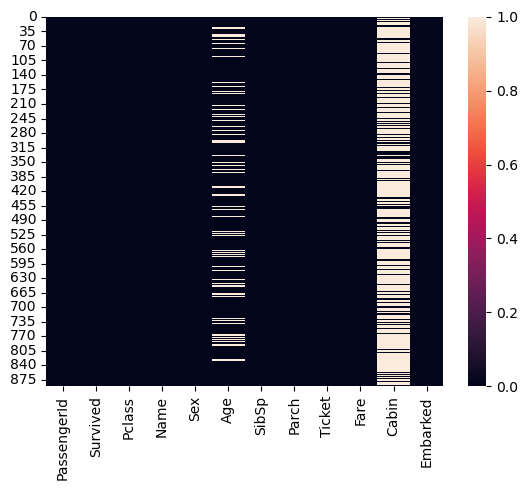

In [9]:
sns.heatmap(train.isnull())

In [10]:
columns_name = ['Name', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'PassengerId']

def clean(d):
    # Drop the specified columns
    d.drop(columns=columns_name, axis=1, inplace=True)
    
    # Fill missing values in 'Age' with the median age
    d['Age'] = d['Age'].fillna(d['Age'].median())
    
    # Drop rows with any remaining missing values
    d.dropna(inplace=True)
    
    return d


In [11]:
clean(train)

,Survived,Pclass,Sex,Age,SibSp,Parch
0,0,3,male,22.0,1,0
1,1,1,female,38.0,1,0
2,1,3,female,26.0,0,0
3,1,1,female,35.0,1,0
4,0,3,male,35.0,0,0
...,...,...,...,...,...,...
886,0,2,male,27.0,0,0
887,1,1,female,19.0,0,0
888,0,3,female,28.0,1,2
889,1,1,male,26.0,0,0


In [12]:
clean (test)

,Pclass,Sex,Age,SibSp,Parch
0,3,male,34.5,0,0
1,3,female,47.0,1,0
2,2,male,62.0,0,0
3,3,male,27.0,0,0
4,3,female,22.0,1,1
...,...,...,...,...,...
413,3,male,27.0,0,0
414,1,female,39.0,0,0
415,3,male,38.5,0,0
416,3,male,27.0,0,0


<Axes: >

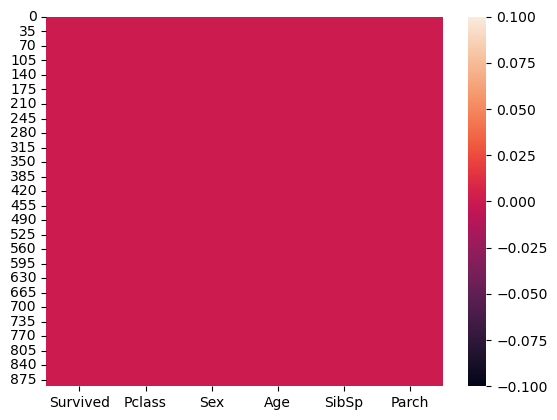

In [13]:
sns.heatmap(train.isnull())

In [14]:
# Select only numeric columns
numeric_df = train.select_dtypes(include='number')

# Calculate the correlation matrix
corr_matrix = numeric_df.corr()
corr_matrix 

,Survived,Pclass,Age,SibSp,Parch
Survived,1.000000,-0.338481,-0.064910,-0.035322,0.081629
Pclass,-0.338481,1.000000,-0.339898,0.083081,0.018443
Age,-0.064910,-0.339898,1.000000,-0.233296,-0.172482
SibSp,-0.035322,0.083081,-0.233296,1.000000,0.414838
Parch,0.081629,0.018443,-0.172482,0.414838,1.000000


<Axes: >

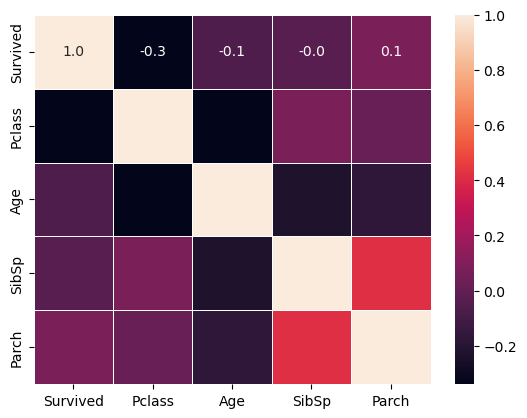

In [15]:
sns.heatmap(corr_matrix,annot=True,fmt='.1f',linewidth=0.5)

In [16]:
train['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

In [17]:
train['Sex'].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

<Axes: ylabel='count'>

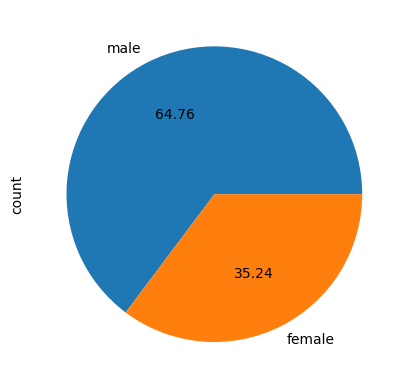

In [18]:
train['Sex'].value_counts().plot.pie(autopct='%0.2f')

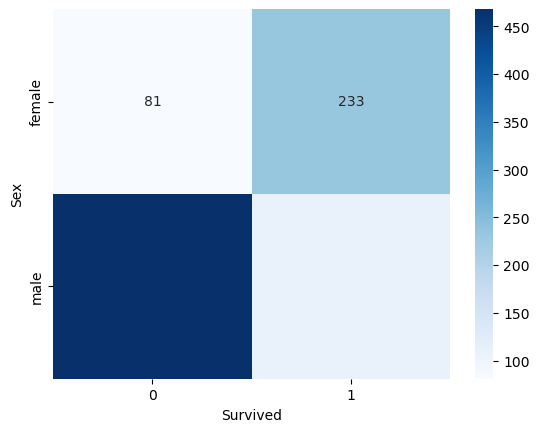

In [19]:
cross_tab = pd.crosstab(train['Sex'], train['Survived'])

sns.heatmap(cross_tab, annot=True, cmap='Blues', fmt='d')
plt.show()

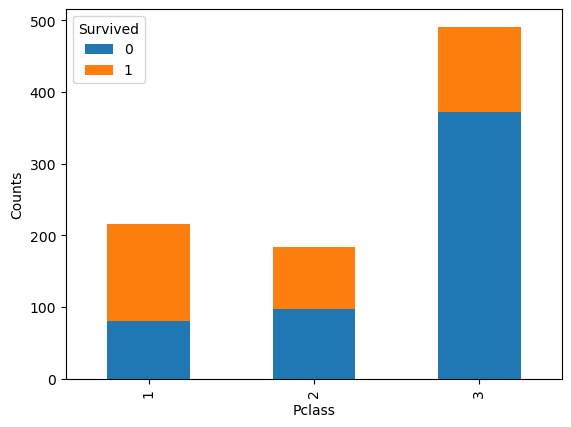

In [20]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have two columns 'col1' and 'col2'
value_counts = train.groupby('Pclass')['Survived'].value_counts().unstack().fillna(0)

value_counts.plot(kind='bar', stacked=True)
plt.ylabel('Counts')
plt.show()



C:\Users\96654\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Age', ylabel='Count'>

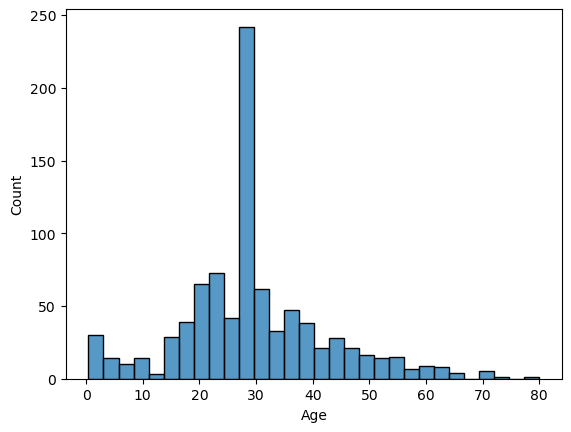

In [21]:
sns.histplot(train['Age'])

In [22]:
train

,Survived,Pclass,Sex,Age,SibSp,Parch
0,0,3,male,22.0,1,0
1,1,1,female,38.0,1,0
2,1,3,female,26.0,0,0
3,1,1,female,35.0,1,0
4,0,3,male,35.0,0,0
...,...,...,...,...,...,...
886,0,2,male,27.0,0,0
887,1,1,female,19.0,0,0
888,0,3,female,28.0,1,2
889,1,1,male,26.0,0,0


In [23]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
dtypes: float64(1), int64(4), object(1)
memory usage: 41.9+ KB


In [24]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
def scale (s):
    s['Sex'] = label_encoder.fit_transform(s['Sex'])
    return s

In [25]:
scale(train)

,Survived,Pclass,Sex,Age,SibSp,Parch
0,0,3,1,22.0,1,0
1,1,1,0,38.0,1,0
2,1,3,0,26.0,0,0
3,1,1,0,35.0,1,0
4,0,3,1,35.0,0,0
...,...,...,...,...,...,...
886,0,2,1,27.0,0,0
887,1,1,0,19.0,0,0
888,0,3,0,28.0,1,2
889,1,1,1,26.0,0,0


In [26]:
scale (test)

,Pclass,Sex,Age,SibSp,Parch
0,3,1,34.5,0,0
1,3,0,47.0,1,0
2,2,1,62.0,0,0
3,3,1,27.0,0,0
4,3,0,22.0,1,1
...,...,...,...,...,...
413,3,1,27.0,0,0
414,1,0,39.0,0,0
415,3,1,38.5,0,0
416,3,1,27.0,0,0


In [27]:
x=train.drop(['Survived'],axis=1)
y=train['Survived']

In [28]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [29]:
accuracies=[]

In [30]:
def all_models(model):
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    
    print(f"Model: {model.__class__.__name__}")
    print(f"Accuracy: {accuracy}")
    print(f"Confusion Matrix:\n{conf_matrix}")
    print('-' * 30)
    accuracies.append(accuracy)

# List of models to evaluate
models = [
    LogisticRegression(),
    SVC(),
    KNeighborsClassifier(),
    GaussianNB(),
    RandomForestClassifier(),
    DecisionTreeClassifier(),
    LDA(),
    GradientBoostingClassifier()
]

# Iterate over each model and evaluate it using the all_models function
for model in models:
    all_models(model)


Model: LogisticRegression
Accuracy: 0.8324022346368715
Confusion Matrix:
[[91 12]
 [18 58]]
------------------------------
Model: SVC
Accuracy: 0.5754189944134078
Confusion Matrix:
[[100   3]
 [ 73   3]]
------------------------------
Model: KNeighborsClassifier
Accuracy: 0.7653631284916201
Confusion Matrix:
[[91 12]
 [30 46]]
------------------------------
Model: GaussianNB
Accuracy: 0.776536312849162
Confusion Matrix:
[[79 24]
 [16 60]]
------------------------------
Model: RandomForestClassifier
Accuracy: 0.8435754189944135
Confusion Matrix:
[[94  9]
 [19 57]]
------------------------------
Model: DecisionTreeClassifier
Accuracy: 0.8324022346368715
Confusion Matrix:
[[93 10]
 [20 56]]
------------------------------
Model: LinearDiscriminantAnalysis
Accuracy: 0.8324022346368715
Confusion Matrix:
[[92 11]
 [19 57]]
------------------------------
Model: GradientBoostingClassifier
Accuracy: 0.8603351955307262
Confusion Matrix:
[[96  7]
 [18 58]]
------------------------------


In [31]:
algorithms=['LogisticRegression','SVC','KNeighborsClassifier','GaussianNB','RandomForestClassifier','DecisionTreeClassifier','LinearDiscriminantAnalysis','GradientBoostingClassifier']

In [32]:
accuracies

[0.8324022346368715,
 0.5754189944134078,
 0.7653631284916201,
 0.776536312849162,
 0.8435754189944135,
 0.8324022346368715,
 0.8324022346368715,
 0.8603351955307262]

In [33]:
new = pd.DataFrame({
    'algorithms': algorithms,
    'accuracies': accuracies
})

In [34]:
new

,algorithms,accuracies
0,LogisticRegression,0.832402
1,SVC,0.575419
2,KNeighborsClassifier,0.765363
3,GaussianNB,0.776536
4,RandomForestClassifier,0.843575
5,DecisionTreeClassifier,0.832402
6,LinearDiscriminantAnalysis,0.832402
7,GradientBoostingClassifier,0.860335


In [35]:
test

,Pclass,Sex,Age,SibSp,Parch
0,3,1,34.5,0,0
1,3,0,47.0,1,0
2,2,1,62.0,0,0
3,3,1,27.0,0,0
4,3,0,22.0,1,1
...,...,...,...,...,...
413,3,1,27.0,0,0
414,1,0,39.0,0,0
415,3,1,38.5,0,0
416,3,1,27.0,0,0


In [36]:
best_model = GradientBoostingClassifier()
best_model.fit(x_train, y_train)

prediction = best_model.predict(test)
prediction[ : 10]

array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0], dtype=int64)

In [37]:
test.head(10)

,Pclass,Sex,Age,SibSp,Parch
0,3,1,34.5,0,0
1,3,0,47.0,1,0
2,2,1,62.0,0,0
3,3,1,27.0,0,0
4,3,0,22.0,1,1
5,3,1,14.0,0,0
6,3,0,30.0,0,0
7,2,1,26.0,1,1
8,3,0,18.0,0,0
9,3,1,21.0,2,0


In [38]:
# Ensure the column names are properly set
test.columns = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch']

# Create a DataFrame with the test data and predictions
result_df = pd.DataFrame(test)
result_df['Prediction'] = prediction

# Display the first few rows of the result
result_df.head(10)

,Pclass,Sex,Age,SibSp,Parch,Prediction
0,3,1,34.5,0,0,0
1,3,0,47.0,1,0,0
2,2,1,62.0,0,0,0
3,3,1,27.0,0,0,0
4,3,0,22.0,1,1,0
5,3,1,14.0,0,0,0
6,3,0,30.0,0,0,1
7,2,1,26.0,1,1,0
8,3,0,18.0,0,0,1
9,3,1,21.0,2,0,0
